In [69]:
###########import packages##########
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
from keras import regularizers
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.constraints import max_norm
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.models import Model
from keras.layers import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier 
from keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import maxnorm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sko.GA import GA
from sko.PSO import PSO
import time
from keras.models import Model, load_model
from sko.GA import GA
from sko.DE import DE
from sklearn import tree
from sklearn.metrics import r2_score
import pickle



In [70]:
###########fix random seed for reproducability##########

database=pd.read_csv('finaldatabase.csv')
seed=1
np.random.seed(seed)
###########wrapping root mean square error for later calls##########
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def rmse2(predictions, targets):
    return np.abs((predictions - targets)/targets).mean()
###########loading data##########
#fdata=pd.read_csv('database.csv',encoding="utf-8")
raw_data=database.loc[:,[                     
    'xN2a_in0',#0
    'RH_CC',#1
    'dela_CH (mm)',#2
    'dela_M (um)',#3
    'dela_GDL (um)',#4
    'p_A (atm)',#5
    'T_cc (K)',#6
    'E cell (V)',#7
    'current',#8
    'fyN2',#9
    
                    
                        ]]
###########data standardization##########
standardized_data = (raw_data-np.mean(raw_data,axis=0))/np.std(raw_data,axis=0)

###########defining a wrapper function for later call from each machine learning algorithms##########
raw_input=standardized_data.iloc[:,0:8]
raw_output=standardized_data.iloc[:,8:]
X=raw_input.values.astype(np.float32)
y=raw_output.values.astype(np.float32)
###########fix random seed for reproducability##########
seed=1
###########train test splitting##########
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15,random_state=seed)
raw_input_global=raw_data.iloc[:,0:8]
raw_output_global=raw_data.iloc[:,8:]
###########wrap up fuction for later call for OPTIMIZATION##########
def evaluate(pre_2,real_2):
    pre_2=np.array(pre_2)
    real_2=np.array(real_2)
    pre_2_series=pd.Series(pre_2)
    real_2_series=pd.Series(real_2)
    return rmse(pre_2,real_2), round(pre_2_series.corr(real_2_series), 3)
def compare(list_name,limit):
    judge=1
    for a in list_name:
        if a < limit:
            judge=judge*1
        else:
            judge=judge*0
    return judge
def generate_arrays_from_file(path):
    while True:
        with open(path) as f:
            for line in f:
                # create numpy arrays of input data
                # and labels, from each line in the file
                x1, x2, y = process_line(line)
                yield ({'input_1': x1, 'input_2': x2}, {'output': y})
neurons1=500
regularizer=keras.regularizers.l2(0)
dropout_rate=0
epochs_number=1000
learning_rate_search=0.000005
batch_size_number=32
activation1='relu'



In [71]:
model=keras.models.load_model('ann.h5')

scatter current_corr  0.99999 scatter current_rmse  0.0021489749869756584 scatter current_r2  0.99998


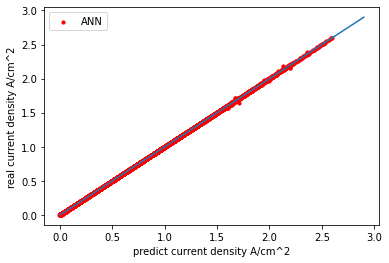

scatter crossover_rate_corr  0.99928 scatter crossover_rate_rmse  4.440832534431044e-17 scatter crossover_rate_r2  0.99856


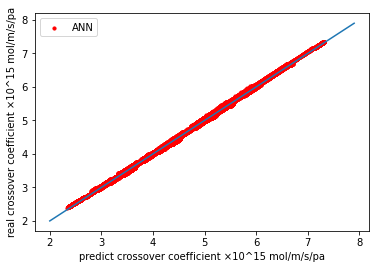

In [72]:
algorithm_name='ANN'
result=model.predict(X)
lpredictvalues=np.std(raw_output_global,axis=0).T.values*result+np.mean(raw_output_global,axis=0).T.values
lrealvalues=np.std(raw_output_global,axis=0).T.values*y+np.mean(raw_output_global,axis=0).T.values
spredictvalues_power=pd.Series(lpredictvalues[:,0])
srealvalues_power=pd.Series(lrealvalues[:,0])
current_corr=round(spredictvalues_power.corr(srealvalues_power), 5)
current_rmse=rmse(lpredictvalues[:,0],lrealvalues[:,0])
current_r2 = round(r2_score(lpredictvalues[:,0],lrealvalues[:,0]), 5)
print('scatter current_corr ',current_corr,'scatter current_rmse ',current_rmse,'scatter current_r2 ',current_r2)
x_y_x=np.arange(0,3,0.1)
x_y_y=np.arange(0,3,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(lpredictvalues[:,0],lrealvalues[:,0],color='red',s=10,label='ANN')
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict current density A/cm^2")
plt.ylabel(u"real current density A/cm^2")
plt.savefig('%s CurrentdensityRegression.jpg' %algorithm_name)
plt.show()

spredictvalues_velocity=pd.Series(lpredictvalues[:,1])
srealvalues_velocity=pd.Series(lrealvalues[:,1])
crossover_rate_corr=round(spredictvalues_velocity.corr(srealvalues_velocity), 5)
crossover_rate_rmse=rmse(lpredictvalues[:,1],lrealvalues[:,1])
crossover_rate_r2 = round(r2_score(lpredictvalues[:,1],lrealvalues[:,1]), 5)
print('scatter crossover_rate_corr ',crossover_rate_corr,'scatter crossover_rate_rmse ',crossover_rate_rmse,'scatter crossover_rate_r2 ',crossover_rate_r2)
x_y_x=np.arange(2,8,0.1)
x_y_y=np.arange(2,8,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(lpredictvalues[:,1]*1e15,lrealvalues[:,1]*1e15,color='red',s=10,label='ANN')
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict crossover coefficient ×10^15 mol/m/s/pa")
plt.ylabel(u"real crossover coefficient ×10^15 mol/m/s/pa")
plt.savefig('%s CrossovercoefficientRegression.jpg' %algorithm_name)
plt.show()

In [92]:
model.layers




In [5]:
def rmse2(predictions, targets):
    return np.abs((predictions - targets)/targets).mean()
###########loading data##########

In [6]:
current_rmse2=rmse2(lpredictvalues[:,0],lrealvalues[:,0])
current_rmse2

0.021575700377097048

In [7]:
crossover_rmse2=rmse2(lpredictvalues[:,1],lrealvalues[:,1])
crossover_rmse2

0.008781813272750693

In [8]:
import shap
# %matplotlib
namelist=list(raw_data)
standardized_data_SHAP = standardized_data.sample(5000,random_state=1)
SHAP_INPUT=standardized_data_SHAP.iloc[:,0:8]
SHAP_OUTPUT=standardized_data_SHAP.iloc[:,9]

X_SHAP=SHAP_INPUT.values.astype(np.float32)
y_SHAP=SHAP_OUTPUT.values.astype(np.float32)


In [9]:
explainer = shap.SamplingExplainer(model.predict,X_SHAP)
shap_values = explainer.shap_values(X_SHAP)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [16]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0],raw_input)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


In [27]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1],raw_input)

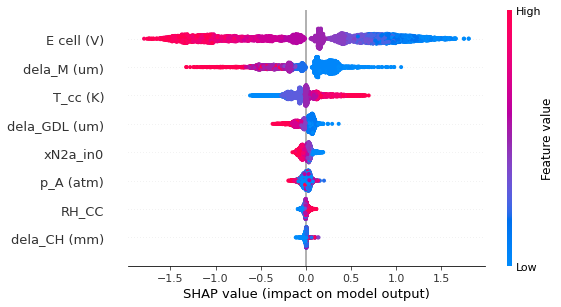

In [94]:
shap.summary_plot(shap_values[0],X_SHAP,feature_names=namelist)

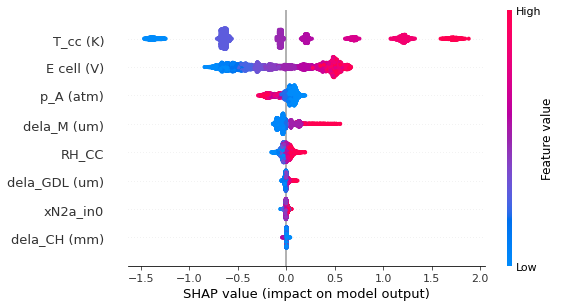

<Figure size 432x288 with 0 Axes>

In [16]:

shap.summary_plot(shap_values[1],X_SHAP,feature_names=namelist)
plt.savefig('%s tupical_prediction_path500.jpg' %'ANN',bbox_inches = 'tight')
plt.show()

In [34]:
explainer.expected_value

array([-0.01418957, -0.01322269])

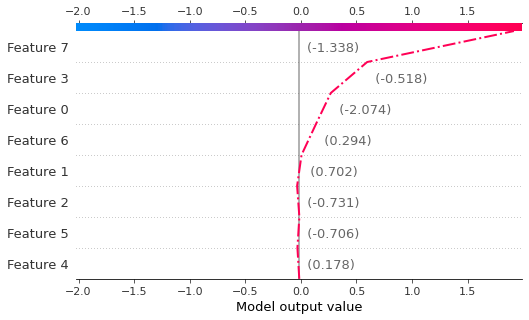

In [37]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][0], X_test,show=False,highlight=0)

In [43]:
import warnings

In [71]:
expected_value=explainer.expected_value.tolist()[0]

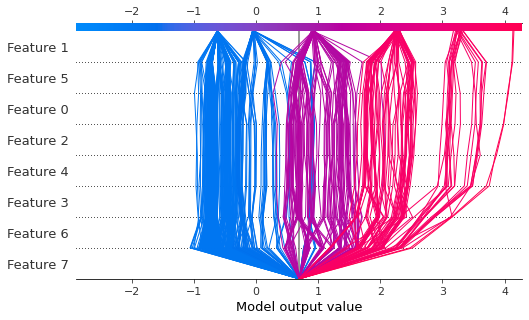

In [183]:
##identify typical prediction pahths
expected_value=explainer.expected_value.tolist()
expected_value=np.std(raw_output_global,axis=0).T.values*expected_value+np.mean(raw_output_global,axis=0).T.values
expected_value=expected_value[0]
##identify typical prediction pahths
y_pred = pd.DataFrame(model.predict(X_SHAP))
y_pred=np.std(raw_output_global,axis=0).T.values*y_pred+np.mean(raw_output_global,axis=0).T.values
y_pred=y_pred[0]

T = X_SHAP[(y_pred >= 0)&(y_pred <= 0.01)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh[0], T, feature_order='hclust',show=False)

T = X_SHAP[(y_pred >= 0.3)&(y_pred <= 0.32)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh[0], T, feature_order='hclust',show=False)

T = X_SHAP[(y_pred >= 0.8)&(y_pred <= 0.83)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh[0], T, feature_order='hclust',show=False)

T = X_SHAP[(y_pred >= 1.5)&(y_pred <=1.55)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh[0], T, feature_order='hclust',show=False)

T = X_SHAP[(y_pred >= 2)&(y_pred <= 2.1)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh[0], T, feature_order='hclust',show=False)

T = X_SHAP[y_pred >= 2.5]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh[0], T, feature_order='hclust',show=False)

plt.savefig('%s tupical_prediction_path500.jpg' %'ANN',bbox_inches = 'tight')
plt.show()

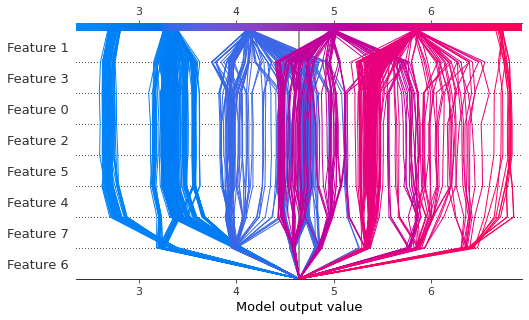

In [178]:
expected_value=explainer.expected_value.tolist()
expected_value=np.std(raw_output_global,axis=0).T.values*expected_value+np.mean(raw_output_global,axis=0).T.values
expected_value=expected_value[1]*1e15
##identify typical prediction pahths
y_pred = pd.DataFrame(model.predict(X_SHAP))
y_pred=np.std(raw_output_global,axis=0).T.values*y_pred+np.mean(raw_output_global,axis=0).T.values
y_pred=y_pred[1]*1e15

T = X_SHAP[(y_pred >= 0)&(y_pred <= 2.5)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh[1], T, feature_order='hclust',show=False)


T = X_SHAP[(y_pred >= 3)&(y_pred <= 3.2)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh[1], T, feature_order='hclust',show=False)

T = X_SHAP[(y_pred >= 4)&(y_pred <= 4.1)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh[1], T, feature_order='hclust',show=False)

T = X_SHAP[(y_pred >= 5)&(y_pred <= 5.1)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh[1], T, feature_order='hclust',show=False)

T = X_SHAP[(y_pred >= 6)&(y_pred <= 6.1)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh[1], T, feature_order='hclust',show=False)

T = X_SHAP[(y_pred >= 7)&(y_pred <= 7.1)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh[1], T, feature_order='hclust',show=False)




plt.savefig('%s tupical_prediction_path500.jpg' %'ANN',bbox_inches = 'tight')
plt.show()


No handles with labels found to put in legend.


['xN2a_in0', 'RH_CC', 'dela_CH (mm)', 'dela_M (um)', 'dela_GDL (um)', 'p_A (atm)', 'T_cc (K)', 'E cell (V)']
[0.04516217 0.01909116 0.00907037 0.27974717 0.07367146 0.03568738
 0.14942262 0.78275442]


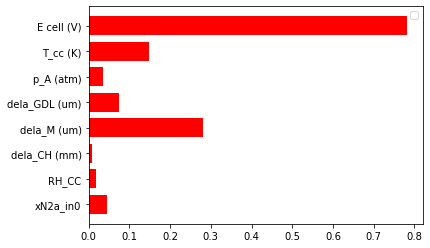

In [67]:
##for current density regression  
#plt.bar(x=df.iloc[:,1],y=namelist,orientation="horizontal")
namelist=namelist[:8]
plt.bar(color='red',x=0, bottom=namelist, height=0.75, width=np.abs(shap_values[0]).mean(0), orientation="horizontal")
plt.legend()
plt.savefig(' featureimportance of ann current regression.jpg',bbox_inches = 'tight')
print(namelist)
print(np.abs(shap_values[0]).mean(0))

No handles with labels found to put in legend.


['xN2a_in0', 'RH_CC', 'dela_CH (mm)', 'dela_M (um)', 'dela_GDL (um)', 'p_A (atm)', 'T_cc (K)', 'E cell (V)']
[0.00872394 0.03740317 0.00240317 0.07691032 0.01281163 0.08339904
 0.69530546 0.4035805 ]


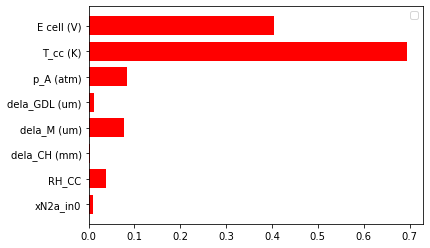

In [68]:
##for current gas crossover  
#plt.bar(x=df.iloc[:,1],y=namelist,orientation="horizontal")
namelist=namelist[:8]
plt.bar(color='red',x=0, bottom=namelist, height=0.75, width=np.abs(shap_values[1]).mean(0), orientation="horizontal")
plt.legend()
plt.savefig(' featureimportance of ann gascrossover.jpg',bbox_inches = 'tight')
print(namelist)
print(np.abs(shap_values[1]).mean(0))

In [45]:
np.abs(shap_values[1]).mean(0)

array([0.00872394, 0.03740317, 0.00240317, 0.07691032, 0.01281163,
       0.08339904, 0.69530546, 0.4035805 ])